#<center>Chest Cancer Detection</center>


*   This project uses an AI model to categorize and determine a patient has which type of cancer.
*   Major application of this project is utilizing data from medical imaging, and building a  AI-powered method for early diagnosis of lung cancer. 

*   The algorithm analyzes CT scans to locate suspicious growths that could be lung cancer using deep learning techniques.
*   This tool's long term goal is to assist radiologists in more quickly and reliably diagnosing lung cancer, facilitating early intervention and better patient outcomes.





In [ ]:
import tensorflow as tf

from keras import optimizers
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from keras.applications import ResNet50, DenseNet201
from keras.applications import resnet, densenet
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pickle

import cv2
import os
import pandas as pd
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image


## Loading Data



*   Data is accessed from shared drive which is downloaded from kaggle.
*   Mount the drive and access each folder with appropriate path.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/Data/train/"
valid_path = "/content/drive/MyDrive/Data/valid/"
test_path = "/content/drive/MyDrive/Data/test/"

#Data Preprocessing


*   Load the images from each directory.


*   Normalize the images and append corresponding class labels to lists.



In [ ]:
# Set image size
img_size = (150, 150)

# Load images and perform preprocessing
def load_and_preprocess_images(directory, img_size):
    X = []
    y = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            # Load image
            img = load_img(file_path)
            # Preprocess image
            img_array = preprocess_image(img, img_size)
            # Append image and corresponding class label to lists
            X.append(img_array)
            y.append(class_name)
    X = np.array(X)
    y = np.array(y)
    return X, y

# Preprocess images
def preprocess_image(img, img_size):
    # Convert image to RGB
    img = img.convert("RGB")
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    # Resize image
    img_array = np.array(Image.fromarray(np.uint8(
        img_array*255)).resize(img_size, resample=Image.BILINEAR))/255.0
    return img_array



Load the train, test and valid data

In [ ]:
# Load and preprocess training data
X_train, y_train = load_and_preprocess_images(train_path, img_size)

# Load and preprocess testing data
X_test, y_test = load_and_preprocess_images(test_path, img_size)

# Load and preprocess validation data
X_valid, y_valid = load_and_preprocess_images(valid_path, img_size)

### Label Encoding
Labeling the target class manually.

In [ ]:
# Convert the label to a number using label encoder
for i,j in enumerate(y_train):
  if j.startswith('large.cell'):
    y_train[i]=0
  elif  j.startswith('adenocarcinoma'):
    y_train[i]=1
  else:
     y_train[i]=2


# Convert the label to a number using label encoder
for i,j in enumerate(y_test):
  if j.startswith('large.cell'):
    y_test[i]=0
  elif  j.startswith('adenocarcinoma'):
    y_test[i]=1
  else:
     y_test[i]=2


# Convert the label to a number using label encoder
for i,j in enumerate(y_valid):
  if j.startswith('large.cell'):
    y_valid[i]=0
  elif  j.startswith('adenocarcinoma'):
    y_valid[i]=1
  else:
     y_valid[i]=2

### One hot encoding

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

#Model Building

### CNN
The code creates a convolutional neural network (CNN) for image classification with:
 The 

*   Convolutional Layers - 4 convolutional layers
*   Max Pooling - 4 max pooling layers


*   Fully connected Layer - 2 fully connected layers



CNN is compiled using the "adam" optimizer and "categorical_crossentropy" loss function. Finally, the model is trained for 15 epochs on the training data (X_train, y_train) with a batch size of 32 and validated using the validation data (X_valid, y_valid). The training history is saved in the "history" variable.

In [ ]:
# Define the input shape of the images
input_shape = (150, 150, 3)

model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Add the first max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add the second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Add the third max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fourth convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))

# Add the fourth max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 256 neurons
model.add(Dense(units=256, activation='relu'))

# Add a fully connected layer with the number of classes as output
model.add(Dense(units=3, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_valid, y_valid))



Epoch 1/15
15/15 [==============================] - 32s 2s/step - loss: 1.0416 - accuracy: 0.4496 - val_loss: 1.0601 - val_accuracy: 0.5088
Epoch 2/15
15/15 [==============================] - 30s 2s/step - loss: 0.8242 - accuracy: 0.6316 - val_loss: 0.8494 - val_accuracy: 0.5263
Epoch 3/15
15/15 [==============================] - 30s 2s/step - loss: 0.5861 - accuracy: 0.7456 - val_loss: 0.6882 - val_accuracy: 0.6667
Epoch 4/15
15/15 [==============================] - 30s 2s/step - loss: 0.4892 - accuracy: 0.7982 - val_loss: 0.5793 - val_accuracy: 0.7719
Epoch 5/15
15/15 [==============================] - 30s 2s/step - loss: 0.3556 - accuracy: 0.8640 - val_loss: 0.3683 - val_accuracy: 0.8596
Epoch 6/15
15/15 [==============================] - 30s 2s/step - loss: 0.2327 - accuracy: 0.9079 - val_loss: 0.4369 - val_accuracy: 0.8246
Epoch 7/15
15/15 [==============================] - 30s 2s/step - loss: 0.2246 - accuracy: 0.9276 - val_loss: 0.3429 - val_accuracy: 0.8596
Epoch 8/15
15/15 [==

In [ ]:
best_epoch = np.argmax(history.history['val_accuracy'])

# Evaluate the model on the test set using the best epoch
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Best epoch:', best_epoch)
print('Test accuracy:', test_acc)

8/8 - 3s - loss: 1.4829 - accuracy: 0.7644 - 3s/epoch - 407ms/step
Best epoch: 10
Test accuracy: 0.7644444704055786


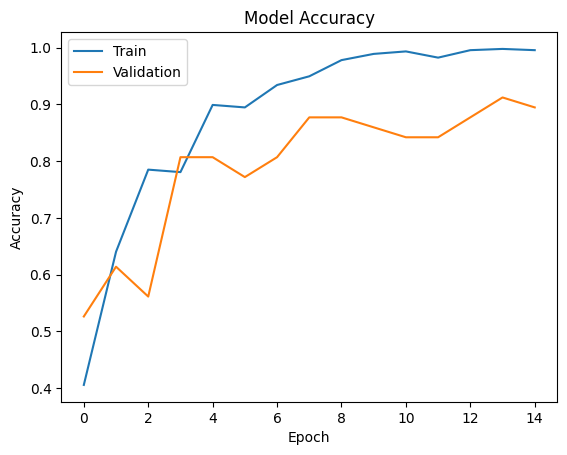

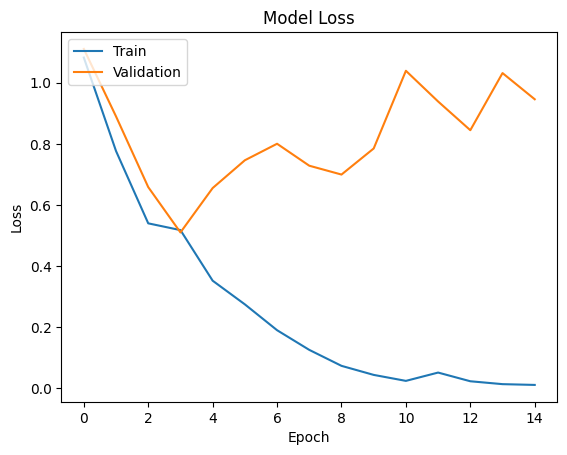

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### ResNet50V2



*   The code defines a transfer learning model based on ResNet50V2 architecture.
*   Pre-trained weights on ImageNet dataset are used to initialize the model.


*   The last classification layer of the original ResNet50V2 is excluded, and a new global average pooling layer and two fully connected layers are added.

*   The model is compiled using the "adam" optimizer and "categorical_crossentropy" loss function.
*   The layers of the ResNet50V2 model are frozen to prevent them from being updated during training.


*   The model is trained on a specific dataset to classify the images into 3 classes.










In [ ]:
import numpy as np 
import pandas as pd 
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
base_model=ResNet50V2(include_top=False , weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512 ,activation='relu')(x)
x=Dense(128 ,activation='relu')(x)
predictions=Dense(3 ,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

### Performance Evaluation graphs

In [ ]:
results=model.fit(X_train, y_train ,epochs=10,validation_data=(X_valid, y_valid),verbose=1 ,batch_size=32)
#(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
15/15 [==============================] - 47s 3s/step - loss: 0.9285 - accuracy: 0.6601 - val_loss: 0.5497 - val_accuracy: 0.7544
Epoch 2/10
15/15 [==============================] - 46s 3s/step - loss: 0.2976 - accuracy: 0.8925 - val_loss: 0.5432 - val_accuracy: 0.7895
Epoch 3/10
15/15 [==============================] - 46s 3s/step - loss: 0.2075 - accuracy: 0.9101 - val_loss: 0.3919 - val_accuracy: 0.8421
Epoch 4/10
15/15 [==============================] - 41s 3s/step - loss: 0.1313 - accuracy: 0.9539 - val_loss: 0.3765 - val_accuracy: 0.8596
Epoch 5/10
15/15 [==============================] - 40s 3s/step - loss: 0.0607 - accuracy: 0.9912 - val_loss: 0.3756 - val_accuracy: 0.8772
Epoch 6/10
15/15 [==============================] - 41s 3s/step - loss: 0.0353 - accuracy: 0.9912 - val_loss: 0.4617 - val_accuracy: 0.8772
Epoch 7/10
15/15 [==============================] - 41s 3s/step - loss: 0.0174 - accuracy: 0.9978 - val_loss: 0.4455 - val_accuracy: 0.8772
Epoch 8/10
15/15 [==

In [ ]:
best_epoch = np.argmax(results.history['val_accuracy'])

# Evaluate the model on the test set using the best epoch
resnet_test_loss, resnet_test_acc = model.evaluate(X_test, y_test)
print('Best epoch:', best_epoch)
print('Test accuracy:', resnet_test_acc)

8/8 [==============================] - 23s 3s/step - loss: 0.3948 - accuracy: 0.8800
Best epoch: 4
Test accuracy: 0.8799999952316284


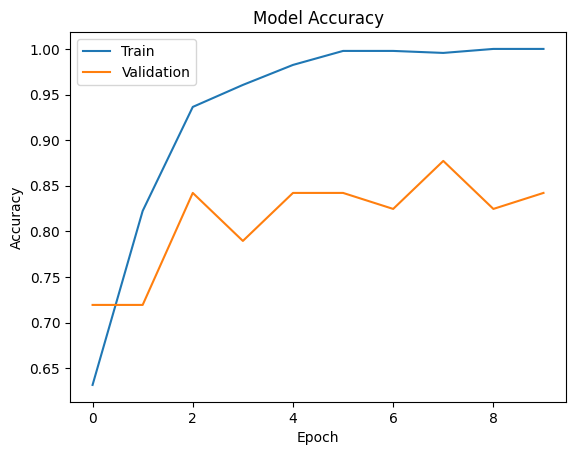

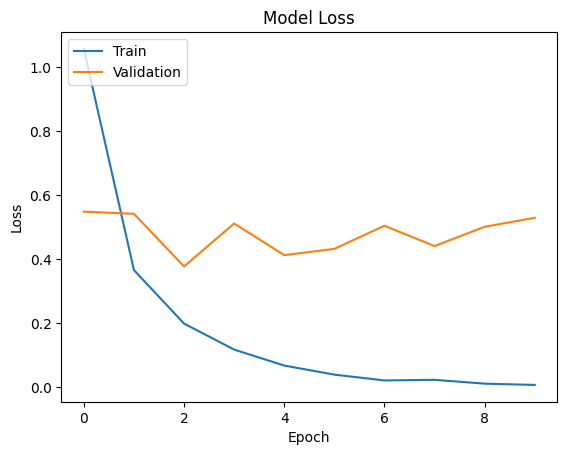

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


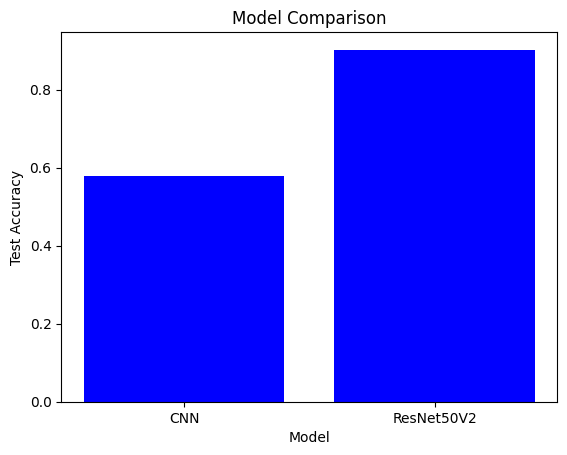

In [ ]:
import matplotlib.pyplot as plt

# Get the test accuracy for each model
accuracies = [test_acc, resnet_test_acc]

# Set the labels for each model
models = ['CNN', 'ResNet50V2']

# Set the x-axis range
x_pos = [i for i, _ in enumerate(models)]

# Create the bar chart
plt.bar(x_pos, accuracies, color='blue')

# Add title and axis labels
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")

# Add the model labels to the x-axis
plt.xticks(x_pos, models)

# Show the bar chart
plt.show()


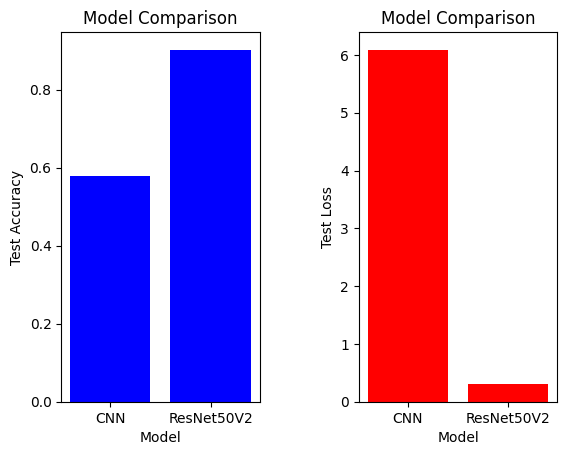

In [ ]:
import matplotlib.pyplot as plt

# Get the test accuracy and test loss for each model
cnn_metrics = test_loss,test_acc
resnet_metrics = resnet_test_loss,resnet_test_acc
accuracies = [cnn_metrics[1], resnet_metrics[1]]
losses = [cnn_metrics[0], resnet_metrics[0]]

# Set the labels for each model
models = ['CNN', 'ResNet50V2']

# Set the x-axis range
x_pos = [i for i, _ in enumerate(models)]

# Create the bar chart for accuracies
plt.subplot(1, 2, 1)
plt.bar(x_pos, accuracies, color='blue')

# Add title and axis labels
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")

# Add the model labels to the x-axis
plt.xticks(x_pos, models)

# Create the bar chart for losses
plt.subplot(1, 2, 2)
plt.bar(x_pos, losses, color='red')

# Add title and axis labels
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Test Loss")

# Add the model labels to the x-axis
plt.xticks(x_pos, models)

# Adjust spacing between the subplots
plt.subplots_adjust(wspace=0.5)

# Show the bar chart
plt.show()


## Conclusion


*   Performed data preprocessing on input data and labelling for target data.
*   Applied CNN to train data and evaluated the performance of model.


*   Perfromed transfer learning by using ResNet50V2 with pretrained model as Imagenet.

*   We observed that the accuracy of CNN reached 76% while for ResNet50V2 it is 86%.


*   Selection of proper pretrained model plays major role in the performance of model as well as computation cost.






